In [2]:
from sklearn.datasets import load_iris
from dynamodelx import UFA
from dynamodelx.plots import draw_plots

In [5]:
data = load_iris()
X, y = data.data, data.target
classes = data.target_names

In [57]:
ufa = UFA(
    task='classification', 
    model_size=None, # None because I want to use my own architecture. 
    input_dim=X.shape[1],
    output_dim=len(classes),
    loss='cross_entropy_loss',
    device='cuda',
    custom_architecture=[6],
    weights_init='xavier',
    hidden_activation='tanh',
    optimizer='adam',
    return_metrics=True,
    auto_build=True,
    multiclass=True, # Since it's multi-class classification
    uncertainty=False
)

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=50,
                    learning_rate=0.01,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=32
                )

Model Configuration:

  Task:               classification
  Model Size:         Custom
  Input Dimension:    4
  Output Dimension:   3
  Loss                cross_entropy_loss
  Device:             cuda
  Hidden Activation:  tanh
  Optimizer:          adam
  Weights Init:       xavier
  Uncertainty:        False
  Multiclass:         True
  Custom Architecture:[6]

Building the model ...

===== Built Model =====
Linear(in_features=4, out_features=6, bias=True)
Tanh()
Linear(in_features=6, out_features=3, bias=True)

Total parameters: 51
Trainable parameters: 51
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 0.09199633640902383 
Average validation loss per sample : 0.08146597445011139

Average test loss per sample: 0.08041270822286606
Confusion matrix on test data: 
 [[5 0 0]
 [0 5 0]
 [0 0 5]]


In [58]:
performance.test

{'test_accuracy': 1.0,
 'test_precision': 1.0,
 'test_recall': 1.0,
 'test_f1': 1.0}

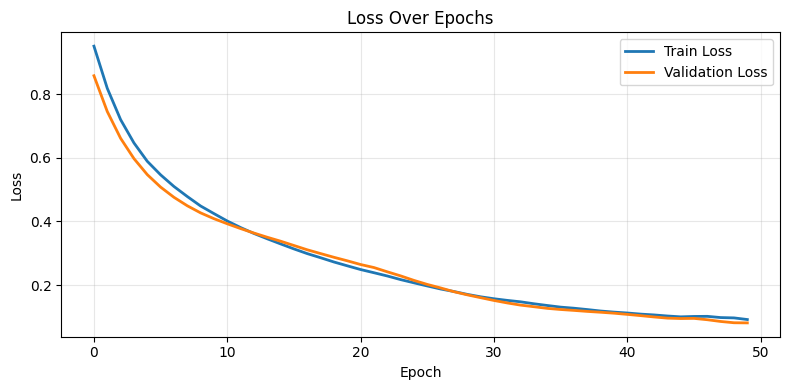

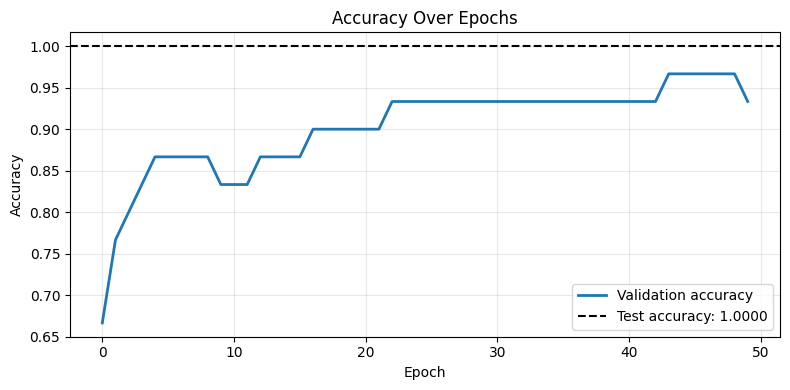

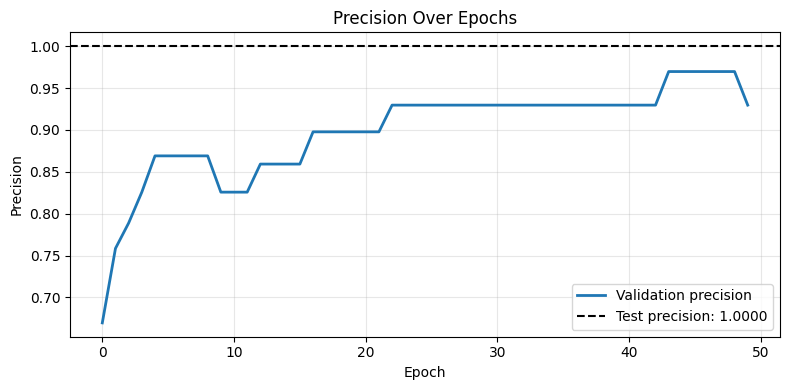

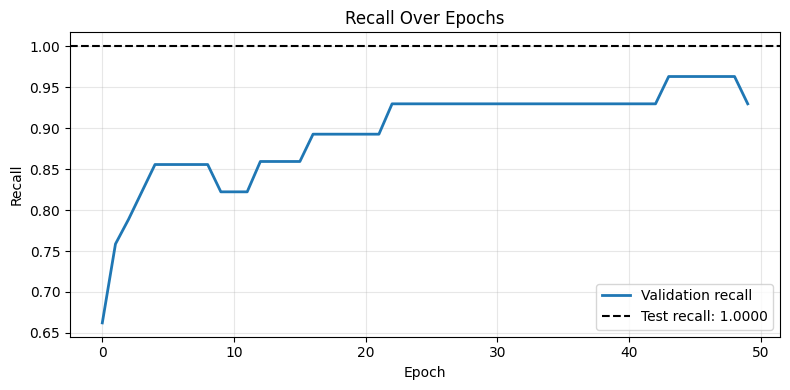

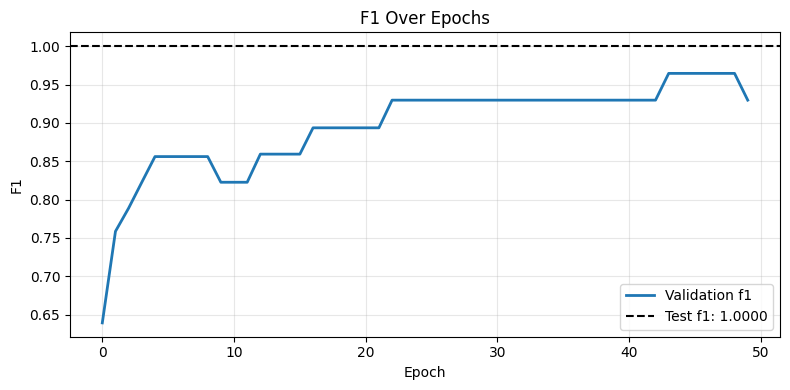

In [60]:
draw_plots(performance)

In [61]:
predictions = ufa.predict(X[:5])
print(predictions, all(predictions == y[:5]))

[0 0 0 0 0] True


In [62]:
ufa.save(path='iris_classification.pt')

Model successfully saved to: iris_classification.pt
